In [12]:
import pandas_datareader.data as web
from datetime import datetime

start = datetime(2014,1,1)
end = datetime(2021,6,4)

kakao = web.get_data_yahoo("035720.KS",start,end)
kakao.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-01-02,17160.0,16840.0,16960.0,17000.0,130585.0,16853.800781
2014-01-03,17140.0,16840.0,17140.0,16900.0,70465.0,16754.662109
2014-01-06,17080.0,16760.0,17080.0,16940.0,110985.0,16794.320312
2014-01-07,17260.0,16820.0,16840.0,17140.0,258375.0,16992.601562
2014-01-08,17440.0,16960.0,17160.0,16980.0,191750.0,16833.976562


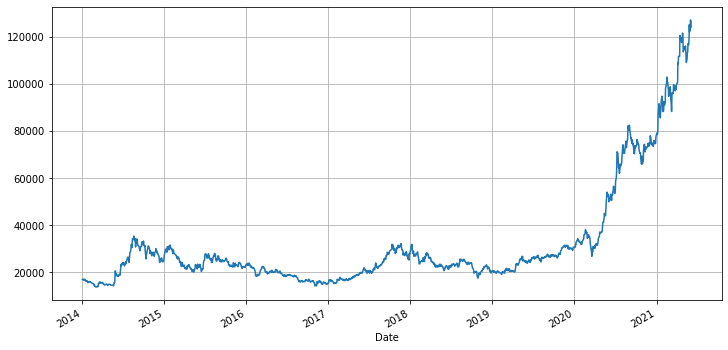

In [13]:
kakao["Close"].plot(figsize=(12,6),grid=True)

In [18]:
import pandas as pd

df = pd.DataFrame({"ds":kakao.index, 'y':kakao["Close"]})
df.reset_index(inplace=True)
del df["Date"]
df.head()

,ds,y
0,2014-01-02,17000.0
1,2014-01-03,16900.0
2,2014-01-06,16940.0
3,2014-01-07,17140.0
4,2014-01-08,16980.0


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


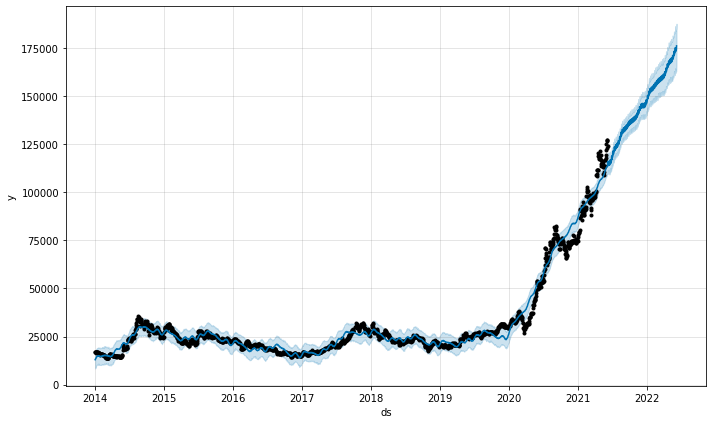

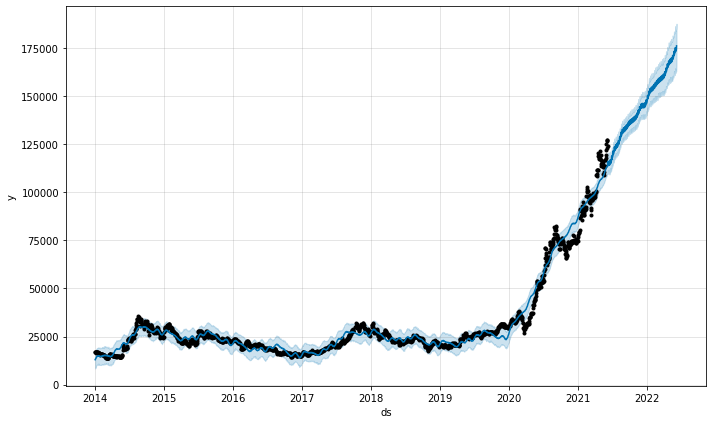

In [21]:
from fbprophet import Prophet

m = Prophet()
m.fit(df)
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
m.plot(forecast)

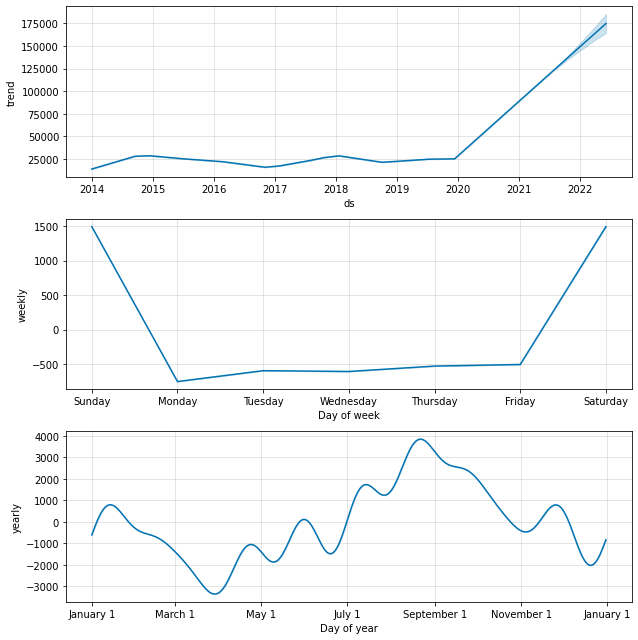

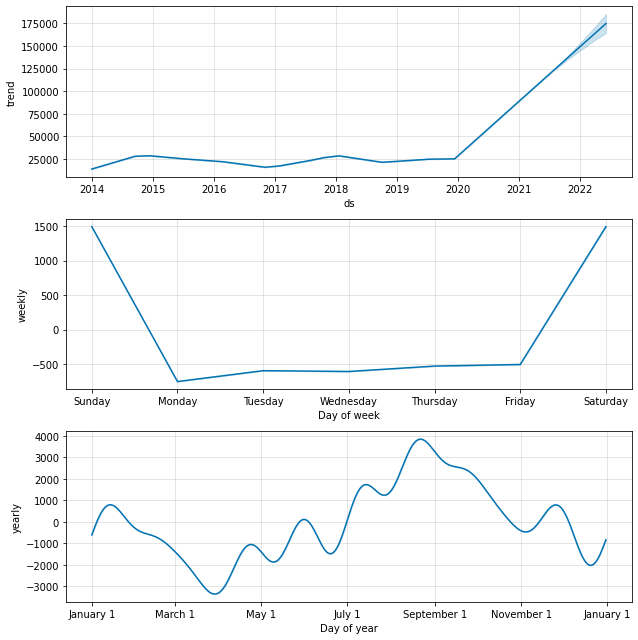

In [22]:
m.plot_components(forecast)

In [26]:
start = datetime(2017,1,1)
end = datetime(2021,5,31)

kakao= web.get_data_yahoo("035720.KS",start,end)
kakao_train = kakao[:'2021-03-31']

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


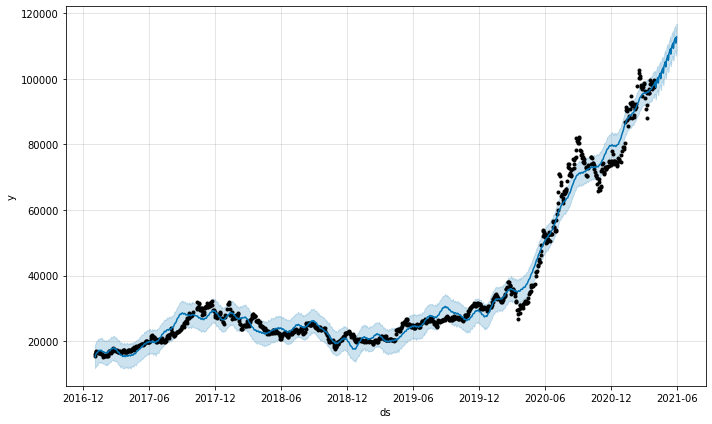

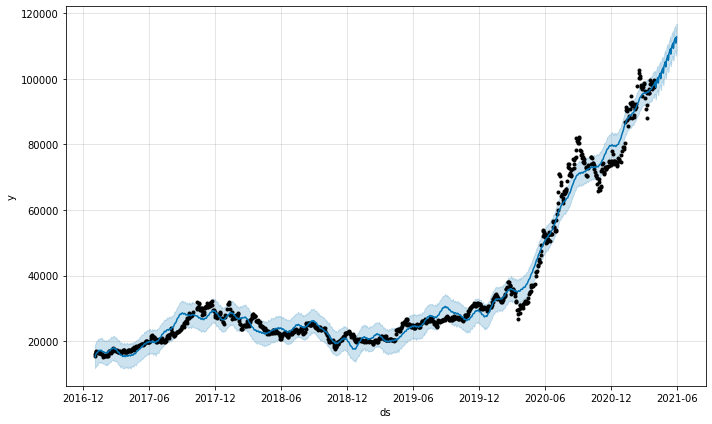

In [27]:
df = pd.DataFrame({"ds":kakao_train.index, 'y':kakao_train["Close"]})
df.reset_index(inplace=True)
del df["Date"]
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(periods=61)
forecast = m.predict(future)
m.plot(forecast)

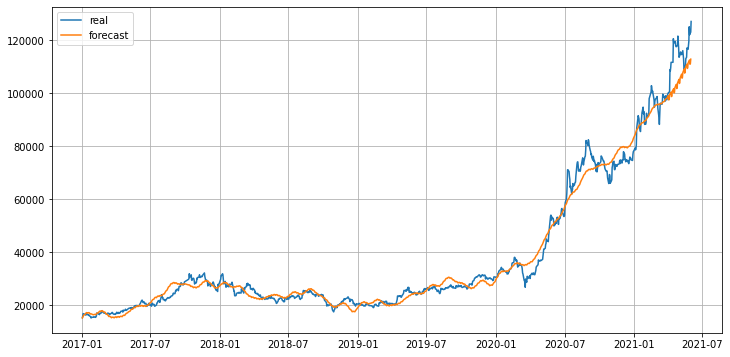

In [29]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(kakao.index, kakao["Close"],label="real")
plt.plot(forecast["ds"],forecast["yhat"],label="forecast")
plt.grid()
plt.legend()
plt.show()